In [2]:
# Dependencies and Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats 
import plotly.express as px


In [3]:
# Read CSV File
df = pd.read_csv ("wages_by_education.csv")
df.head()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


In [4]:
#Display column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             50 non-null     int64  
 1   less_than_hs                     50 non-null     float64
 2   high_school                      50 non-null     float64
 3   some_college                     50 non-null     float64
 4   bachelors_degree                 50 non-null     float64
 5   advanced_degree                  50 non-null     float64
 6   men_less_than_hs                 50 non-null     float64
 7   men_high_school                  50 non-null     float64
 8   men_some_college                 50 non-null     float64
 9   men_bachelors_degree             50 non-null     float64
 10  men_advanced_degree              50 non-null     float64
 11  women_less_than_hs               50 non-null     float64
 12  women_high_school       

QUESTION 1 - •	Are things trending towards females earning as much as males for those with an advanced degree?

In [5]:
df_gender = df.iloc[:, [0, 10, 15]]
df_gender.head()

,year,men_advanced_degree,women_advanced_degree
0,2022,63.51,44.34
1,2021,63.52,44.80
2,2020,62.70,46.04
3,2019,59.93,44.22
4,2018,59.73,43.19


In [6]:
df_gender.columns

Index(['year', 'men_advanced_degree', 'women_advanced_degree'], dtype='object')

In [7]:
fig = px.line(df_gender, x = "year", y = df_gender.columns,title = "Hourly Wage vs Education (1973-2022)")
fig.update_layout(xaxis_title = "Years", yaxis_title = "Hourly Wage", legend_title = "Gender")
fig.show()

In [8]:
#Unpivot the dataset only looking at advanced degrees by gender
df_unpivoted = df_gender.melt(id_vars='year', var_name = 'gender', value_name = 'salary')
df_unpivoted.head()

,year,gender,salary
0,2022,men_advanced_degree,63.51
1,2021,men_advanced_degree,63.52
2,2020,men_advanced_degree,62.70
3,2019,men_advanced_degree,59.93
4,2018,men_advanced_degree,59.73


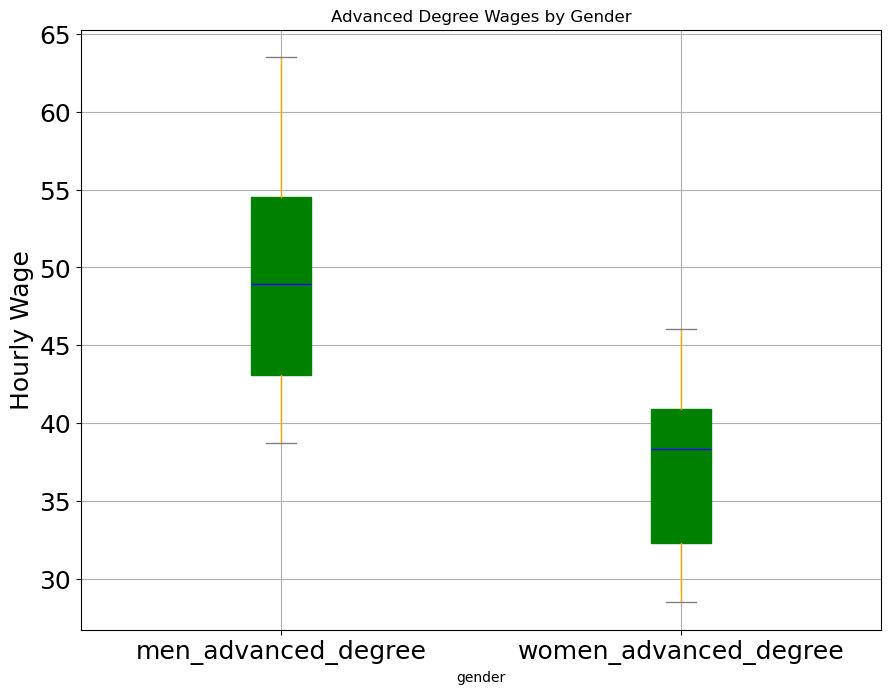

In [9]:
#Color of boxplots
props = dict(boxes="Green", whiskers="Orange", medians="Blue", caps="Gray")

#Create Boxplot
df_unpivoted.boxplot("salary", by="gender", figsize=(10, 8),fontsize=18,color=props,patch_artist=True)

#Labels on Boxplot
plt.title('Advanced Degree Wages by Gender',fontsize=12)
plt.suptitle('')
plt.ylabel('Hourly Wage',fontsize=18)

plt.show()

In [10]:
# Extract individual groups
group0 = df_unpivoted[df_unpivoted["gender"] == 'men_advanced_degree']["salary"]
group1 = df_unpivoted[df_unpivoted["gender"] == 'women_advanced_degree']["salary"]

In [11]:
# Perform the ANOVA
stats.f_oneway(group0, group1)

F_onewayResult(statistic=98.95882314672339, pvalue=1.5709388132185287e-16)

In [12]:
#Run ttest against men_advanced_degree vs women_advanced_degree
stats.ttest_ind(group0, group1, equal_var=False)

TtestResult(statistic=9.947804941127643, pvalue=4.1822362231788787e-16, df=88.83363786823676)

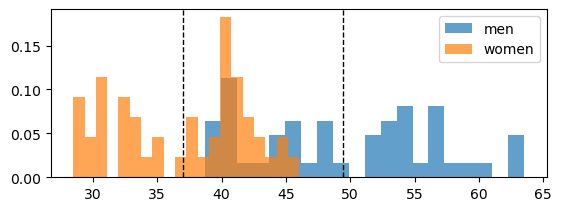

In [13]:
plt.subplot(2, 1, 2)
plt.hist(group0, 20, density=True, alpha = 0.7, label = 'men')
plt.hist(group1, 20, density=True, alpha = 0.7, label = 'women')
plt.axvline(group0.mean(), color ='k', linestyle='dashed', linewidth=1)
plt.axvline(group1.mean(), color ='k', linestyle='dashed', linewidth=1)
plt.legend()

QUESITON 2 - •	Does the increase in education affect the increase in salary for both men and women equally?

In [14]:
# Calculate the average hourly wage for 1973-2022 grouped by gender and education level
ave_salary = {'Education Level': ['Less Than High School', 'High School', 'Some College ', 'Bachelors Degree', 'Advanced Degree'],
              'Men': [df['men_less_than_hs'].mean(), df['men_high_school'].mean(), df['men_some_college'].mean(), 
                      df['men_bachelors_degree'].mean(), df['men_advanced_degree'].mean()],
              'Women': [df['women_less_than_hs'].mean(), df['women_high_school'].mean(), df['women_some_college'].mean(), 
                      df['women_bachelors_degree'].mean(), df['women_advanced_degree'].mean()],              
              }

ave_salary_df = pd.DataFrame(ave_salary)
ave_salary_df

,Education Level,Men,Women
0,Less Than High School,17.5652,12.8514
1,High School,23.8326,17.5716
2,Some College,26.3338,19.9432
3,Bachelors Degree,39.9884,28.9264
4,Advanced Degree,49.4302,36.9752


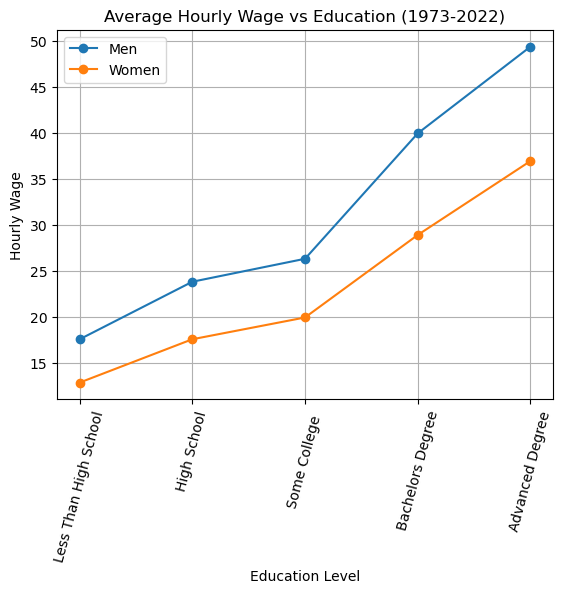

In [15]:

# Create line graph showing average hourly wage by gender and education level
fig, ax = plt.subplots()

# Plotting the lines on the axes
ax.plot(ave_salary_df["Education Level"], ave_salary_df['Men'], marker='o', label='Men')
ax.plot(ave_salary_df["Education Level"], ave_salary_df['Women'], marker='o', label='Women')


# Customize the plot
ax.set_xlabel('Education Level')
ax.set_ylabel('Hourly Wage')
ax.set_title('Average Hourly Wage vs Education (1973-2022)')
plt.xticks(rotation=75)
ax.legend()
ax.grid(True)

plt.show()

In [16]:
#Calculate rate of change of hourly rate for each year grouped by gender and education level.
change_df = pd.DataFrame()
change_df['year']=df['year']

change_df['rate_change_hs_men']= (df['men_high_school']-df['men_less_than_hs'])/df['men_less_than_hs']*100
change_df['rate_change_hs_women']= (df['women_high_school']-df['women_less_than_hs'])/df['women_less_than_hs']*100
change_df['rate_change_bachelors_men']= (df['men_bachelors_degree']-df['men_high_school'])/df['men_high_school']*100
change_df['rate_change_bachelors_women']= (df['women_bachelors_degree']-df['women_high_school'])/df['women_high_school']*100
change_df.head()




,year,rate_change_hs_men,rate_change_hs_women,rate_change_bachelors_men,rate_change_bachelors_women
0,2022,33.852140,32.100488,103.529900,81.669308
1,2021,32.824427,34.818942,96.346470,81.198347
2,2020,33.742004,34.375000,91.909127,82.997416
3,2019,36.695157,32.378223,90.662776,82.900433
4,2018,34.011299,38.398204,89.586847,78.637101


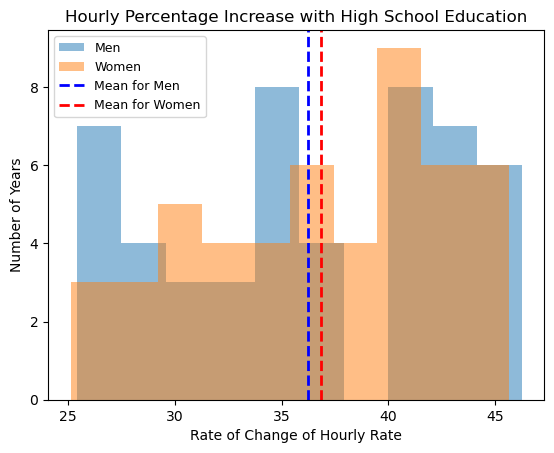

The mean falue for men = 36.21546624652191
The mean falue for women = 36.823847090506625
p-value: 0.620632068753353


In [17]:
# Histogram plot showing the rate of change in hourly salary with a high school deploma grouped by gender 
plt.hist(change_df['rate_change_hs_men'],  alpha=0.5, label='Men')
plt.hist(change_df['rate_change_hs_women'], alpha=0.5, label='Women')

# Calculate the mean
mean_value_m = np.mean(change_df['rate_change_hs_men'])
mean_value_w = np.mean(change_df['rate_change_hs_women'])

# Plot the mean as a vertical line on the histogram
plt.axvline(mean_value_m, color='blue', linestyle='dashed', linewidth=2, label='Mean for Men')
plt.axvline(mean_value_w, color='red', linestyle='dashed', linewidth=2, label='Mean for Women')
plt.legend(loc='upper left', prop={'size': 9})
plt.xlabel('Rate of Change of Hourly Rate')
plt.ylabel('Number of Years')

plt.title('Hourly Percentage Increase with High School Education')
plt.show()

# print off the mean values for the rate change
print(f'The mean falue for men = {mean_value_m}')
print(f'The mean falue for women = {mean_value_w}')

from scipy.stats import ttest_ind

# Perform two-sample t-test men vs women
t_statistic, p_value = ttest_ind(change_df['rate_change_hs_men'], change_df['rate_change_hs_women'])
print(f'p-value: {p_value}')


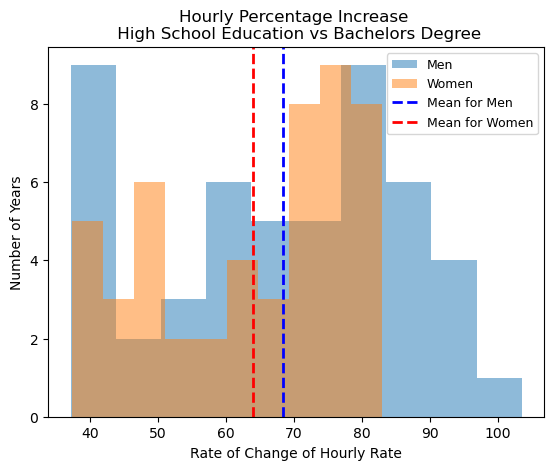

The mean falue for men = 68.34786140406185
The mean falue for women = 64.04608412308932
p-value: 0.19967304397146746


In [18]:
# Histogram plot showing the rate of change in hourly salary with a Bachelors Degree grouped by gender 
plt.hist(change_df['rate_change_bachelors_men'],  alpha=0.5, label='Men')
plt.hist(change_df['rate_change_bachelors_women'], alpha=0.5, label='Women')

# Calculate the mean
mean_value_m = np.mean(change_df['rate_change_bachelors_men'])
mean_value_w = np.mean(change_df['rate_change_bachelors_women'])

# Plot the mean as a vertical line on the histogram
plt.axvline(mean_value_m, color='blue', linestyle='dashed', linewidth=2, label='Mean for Men')
plt.axvline(mean_value_w, color='red', linestyle='dashed', linewidth=2, label='Mean for Women')
plt.legend(loc='upper right', prop={'size': 9})
plt.xlabel('Rate of Change of Hourly Rate')
plt.ylabel('Number of Years')

plt.title('Hourly Percentage Increase \n High School Education vs Bachelors Degree')
plt.show()

# print off the mean values for the rate change
print(f'The mean falue for men = {mean_value_m}')
print(f'The mean falue for women = {mean_value_w}')


# Perform two-sample t-test men vs women
t_statistic, p_value = ttest_ind(change_df['rate_change_bachelors_men'], change_df['rate_change_bachelors_women'])
print(f'p-value: {p_value}')


QUESTION 3 - •	For those with an advanced degree, is there a difference between one of the groups based on race for the last 5 years?

In [19]:
df_ed = df.iloc[:,0:6]
df_ed.head()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22
1,2021,16.74,22.28,24.92,41.32,53.45
2,2020,17.02,22.70,25.44,41.65,53.74
3,2019,16.11,21.64,24.00,39.61,51.57
4,2018,15.94,21.50,23.70,38.87,51.03


In [20]:
df_ed.columns

Index(['year', 'less_than_hs', 'high_school', 'some_college',
       'bachelors_degree', 'advanced_degree'],
      dtype='object')

In [21]:

fig = px.line(df_ed, x = "year", y = df_ed.columns,title = "Hourly Wage vs Education (1973-2022)")
fig.update_layout(xaxis_title = "Years", yaxis_title = "Hourly Wage", legend_title = "Education Level")
fig.show()


In [22]:
#Only look at last 5 years
last_five = df[df['year']>=2018]

#Unpivot the dataset only looking at advanced degrees by race
df_unpivot = pd.melt(last_five, id_vars='year', value_vars=[
    'white_advanced_degree',
    'black_advanced_degree',
    'hispanic_advanced_degree'])
df_unpivot.head()


,year,variable,value
0,2022,white_advanced_degree,53.30
1,2021,white_advanced_degree,53.62
2,2020,white_advanced_degree,53.80
3,2019,white_advanced_degree,51.81
4,2018,white_advanced_degree,51.80


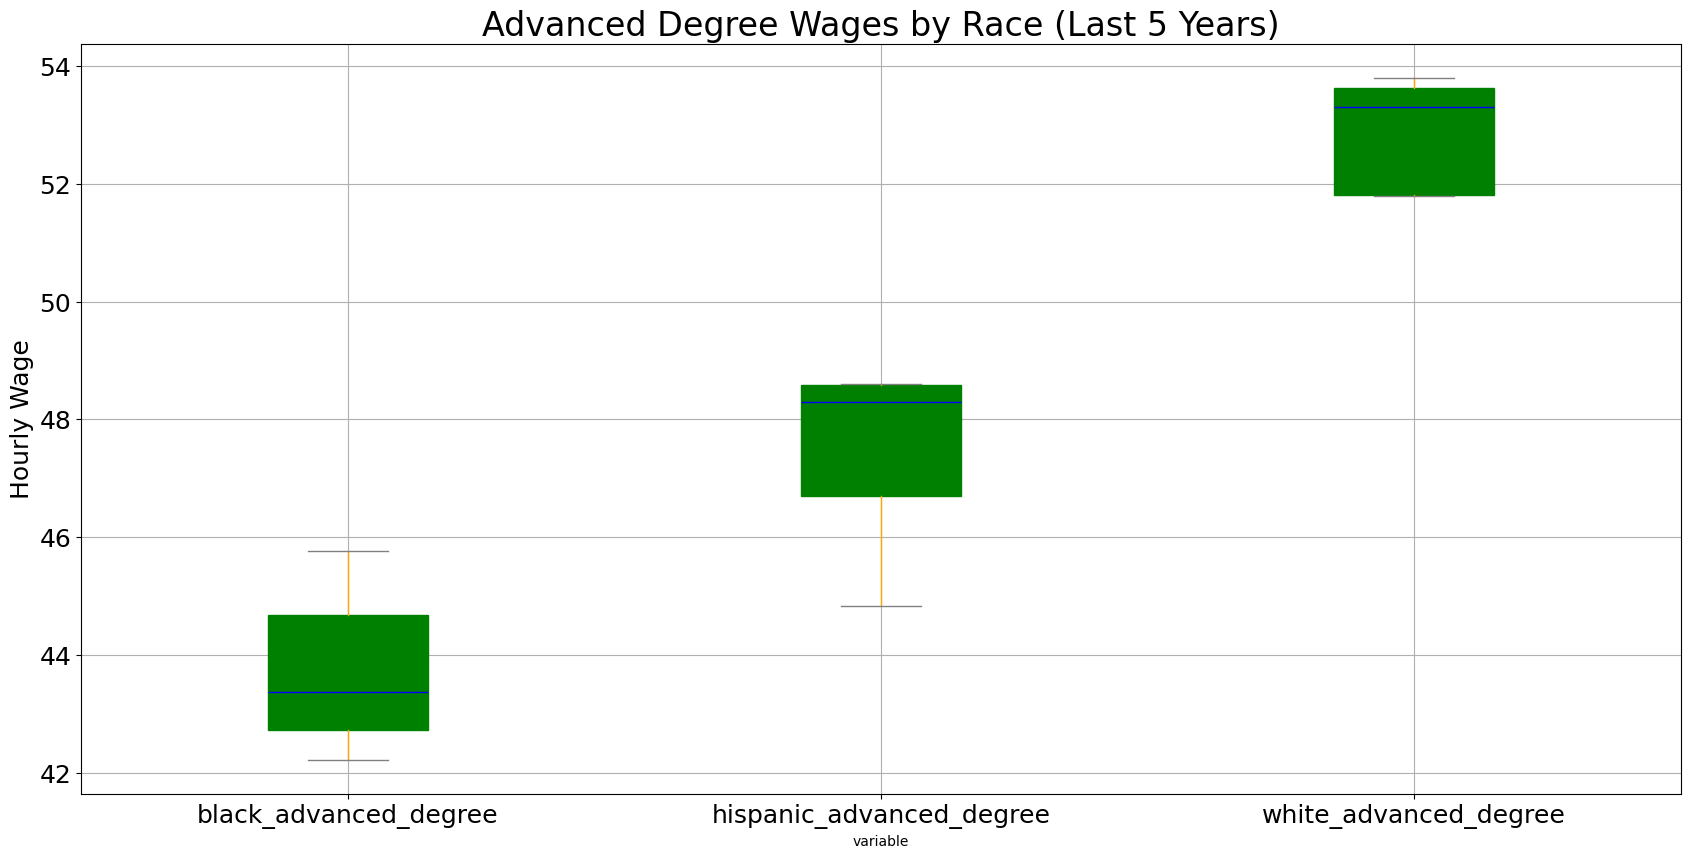

In [23]:
#Color of boxplots
props = dict(boxes="Green", whiskers="Orange", medians="Blue", caps="Gray")

#Create Boxplot
df_unpivot.boxplot("value", by="variable", figsize=(20, 10),fontsize=18,color=props,patch_artist=True)

#Labels on Boxplot
plt.title('Advanced Degree Wages by Race (Last 5 Years)',fontsize=24)
plt.suptitle('')
plt.ylabel('Hourly Wage',fontsize=18)

plt.show()


In [24]:
# Extract individual groups
group0 = df_unpivot[df_unpivot["variable"] == 'black_advanced_degree']["value"]
group1 = df_unpivot[df_unpivot["variable"] == 'hispanic_advanced_degree']["value"]
group2 = df_unpivot[df_unpivot["variable"] == 'white_advanced_degree']["value"]

In [25]:
# Perform the ANOVA
stats.f_oneway(group0, group1, group2)

F_onewayResult(statistic=54.807914488255605, pvalue=9.228834322622075e-07)

In [26]:
#Run ttest against black_advanced_degree vs hispanic_advanced_degree
stats.ttest_ind(group0, group1, equal_var=False)

TtestResult(statistic=-3.728801920810109, pvalue=0.005952927663667684, df=7.882551537760143)

In [27]:
#Unpivot the dataset looking at bachelors degree by race
df_unpivot_bachelors = pd.melt(last_five, id_vars='year', value_vars=[
    'white_bachelors_degree',
    'black_bachelors_degree',
    'hispanic_bachelors_degree'])
df_unpivot_bachelors.head()

,year,variable,value
0,2022,white_bachelors_degree,43.30
1,2021,white_bachelors_degree,43.06
2,2020,white_bachelors_degree,43.16
3,2019,white_bachelors_degree,41.06
4,2018,white_bachelors_degree,40.49


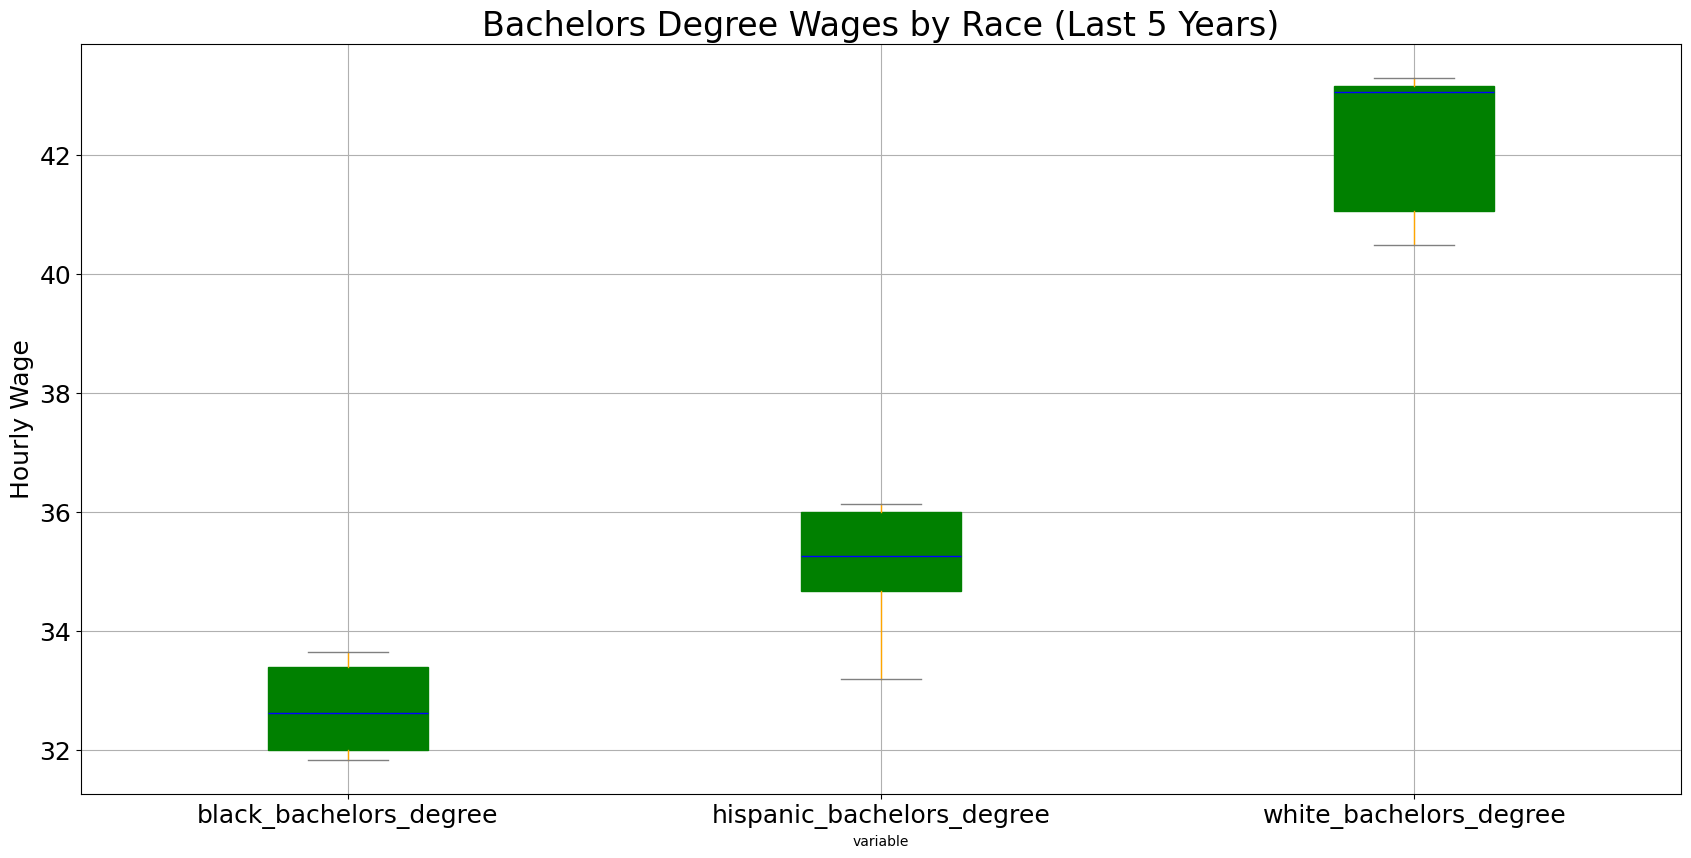

In [28]:
#Color of boxplots
props = dict(boxes="Green", whiskers="Orange", medians="Blue", caps="Gray")

#Create Boxplot
df_unpivot_bachelors.boxplot("value", by="variable", figsize=(20, 10),fontsize=18,color=props,patch_artist=True)

#Labels on Boxplot
plt.title('Bachelors Degree Wages by Race (Last 5 Years)',fontsize=24)
plt.suptitle('')
plt.ylabel('Hourly Wage',fontsize=18)

plt.show()

In [29]:
# Extract individual groups
group3 = df_unpivot_bachelors[df_unpivot_bachelors["variable"] == 'black_bachelors_degree']["value"]
group4 = df_unpivot_bachelors[df_unpivot_bachelors["variable"] == 'hispanic_bachelors_degree']["value"]
group5 = df_unpivot_bachelors[df_unpivot_bachelors["variable"] == 'white_bachelors_degree']["value"]

In [30]:
# Perform the ANOVA
stats.f_oneway(group3, group4, group5)

F_onewayResult(statistic=95.56789221022925, pvalue=4.2498036311925216e-08)

In [31]:
#Run ttest against black_bachelors_degree vs hispanic_bachelors_degree
stats.ttest_ind(group3, group4, equal_var=False)

TtestResult(statistic=-3.6427703022503017, pvalue=0.008212161852051522, df=7.021897118762298)